In [2]:
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

# Loading in the cleaned Data
noBios = pd.read_csv('./mockData/profilesNoBio.csv')
noBios = noBios.loc[:, ~noBios.columns.str.contains('^Unnamed')]
noBios.head()

,Year,Major_Dept,Ambition,Goals,Music,Sports,Friday_Nights,School_balance,Movie_Genres,Social_Style,Transfer
0,4,8,3,1,4,1,2,1,7,3,2
1,3,3,1,2,8,1,1,2,4,2,1
2,1,7,2,2,2,10,1,3,11,2,2
3,4,5,1,1,8,3,2,2,6,3,2
4,2,4,2,1,3,9,2,2,7,1,2


In [3]:
scaler = MinMaxScaler() 
#minmax scaler normalizes the features to be transformed into range of [0,1]
#equation: xScaled = x- xMin divided by xMax - xMin
#more info https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79

noBiosScal = pd.DataFrame(scaler.fit_transform(noBios))
noBiosScal.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1.000000,1.000000,1.0,0.0,0.333333,0.000000,1.0,0.0,0.6,1.0,1.0
1,0.666667,0.285714,0.0,1.0,0.777778,0.000000,0.0,0.5,0.3,0.5,0.0
2,0.000000,0.857143,0.5,1.0,0.111111,1.000000,0.0,1.0,1.0,0.5,1.0
3,1.000000,0.571429,0.0,0.0,0.777778,0.222222,1.0,0.5,0.5,1.0,1.0
4,0.333333,0.428571,0.5,0.0,0.222222,0.888889,1.0,0.5,0.6,0.0,1.0


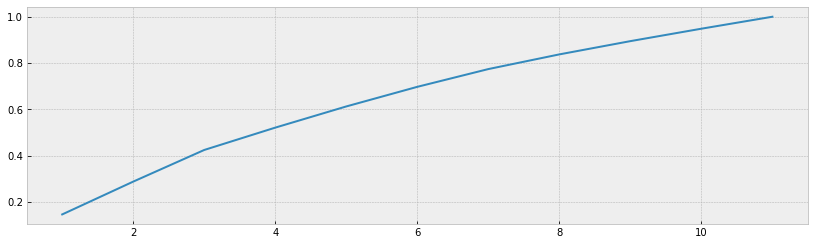

Number features: 10
Total Variance Explained: 0.9999999999999998
0.9483813751649534


In [6]:
from sklearn.decomposition import PCA
pca = PCA()

df_pca = pca.fit_transform(noBiosScal)

plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,noBiosScal.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 95% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = noBiosScal.shape[1] - n_over_95

# Printing out the number of features needed to retain 95% variance
print(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

# Reducing the dataset to the number of features determined before
pca = PCA(n_components=n_to_reach_95)

# Fitting and transforming the dataset to the stated number of features and creating a new DF
df_pca = pca.fit_transform(noBiosScal)

# Seeing the variance ratio that still remains after the dataset has been reduced
print(pca.explained_variance_ratio_.cumsum()[-1])



In [5]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
  
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

NameError: name 'df_pca' is not defined

Max Value:
Cluster #    Cluster Score
8       0.190423

Min Value:
Cluster #    Cluster Score
2        0.11013


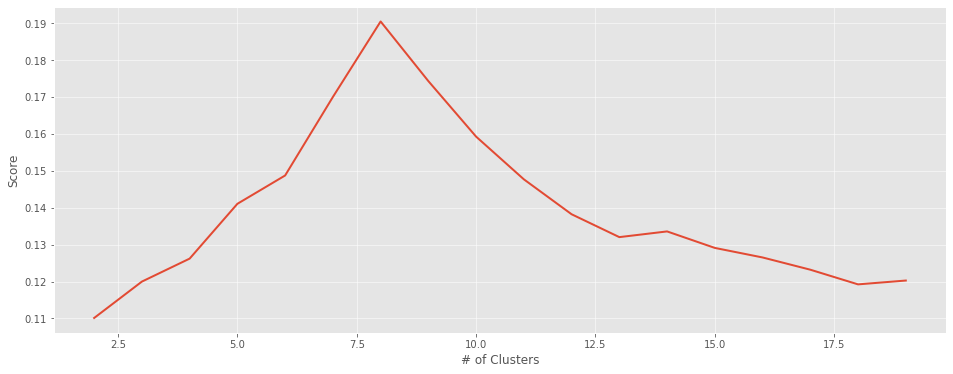

Max Value:
Cluster #    Cluster Score
2       2.721222

Min Value:
Cluster #    Cluster Score
5       1.830313


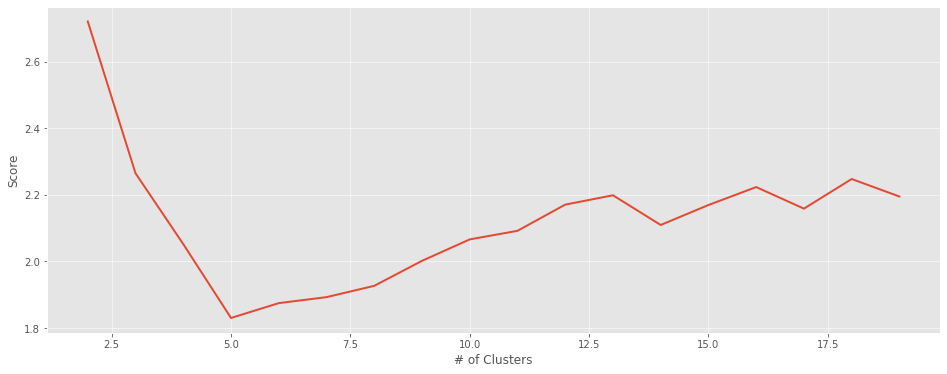

In [14]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()
    
# Running the function on the list of scores
plot_evaluation(s_scores)

plot_evaluation(db_scores)

In [21]:
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=8)

# Fitting
hac.fit(noBios_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

# Unscaling the categories then replacing the scaled values
noBiosScal = pd.DataFrame(scaler.inverse_transform(noBios))

# Assigning the clusters to each profile
noBios['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
noBios

,Year,Major_Dept,Ambition,Goals,Music,Sports,Friday_Nights,School_balance,Movie_Genres,Social_Style,Transfer,Cluster #
0,4,8,3,1,4,1,2,1,7,3,2,1
1,3,3,1,2,8,1,1,2,4,2,1,6
2,1,7,2,2,2,10,1,3,11,2,2,4
3,4,5,1,1,8,3,2,2,6,3,2,1
4,2,4,2,1,3,9,2,2,7,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
670,1,5,1,2,5,9,2,3,6,2,2,7
671,4,1,2,2,6,3,1,3,9,3,2,4
672,2,4,2,1,3,9,2,2,4,1,1,3
673,3,3,2,2,1,7,2,2,1,2,1,2


In [30]:
noBiosClust1 = (noBios[noBios['Cluster #'] == 1])
noBiosClust1.to_csv('mockData/Cluster1.csv')
noBiosClust1.head()

,Year,Major_Dept,Ambition,Goals,Music,Sports,Friday_Nights,School_balance,Movie_Genres,Social_Style,Transfer,Cluster #
0,4,8,3,1,4,1,2,1,7,3,2,1
3,4,5,1,1,8,3,2,2,6,3,2,1
4,2,4,2,1,3,9,2,2,7,1,2,1
29,4,2,3,1,3,10,2,2,5,3,2,1
52,1,3,1,1,2,8,2,1,1,2,2,1


In [31]:
noBiosClust2 = (noBios[noBios['Cluster #'] == 2])
noBiosClust2.to_csv('mockData/Cluster2.csv')
noBiosClust2.head()

,Year,Major_Dept,Ambition,Goals,Music,Sports,Friday_Nights,School_balance,Movie_Genres,Social_Style,Transfer,Cluster #
6,3,8,1,2,3,1,2,1,11,1,1,2
11,2,6,3,2,1,8,2,1,10,2,1,2
14,4,2,1,2,3,5,2,1,2,1,1,2
27,1,7,3,2,3,10,2,2,4,3,1,2
35,1,4,3,2,3,6,2,2,9,3,1,2


In [44]:
ambition1Clust2 =(noBiosClust2[noBiosClust2['Ambition'] == 1])
ambition1Clust2.head(10)
# ambitionClust2 = noBiosClust2.corrwith(ambition1Clust2)
# ambitionClust2.head()
# corrClust2 = pd.DataFrame(ambitionClust2, columns=['Correlation'])
# corrClust2.head()

,Year,Major_Dept,Ambition,Goals,Music,Sports,Friday_Nights,School_balance,Movie_Genres,Social_Style,Transfer,Cluster #
6,3,8,1,2,3,1,2,1,11,1,1,2
14,4,2,1,2,3,5,2,1,2,1,1,2
36,3,3,1,2,5,3,2,2,8,2,1,2
93,4,1,1,2,10,6,2,2,1,3,1,2
165,3,4,1,2,6,5,2,1,7,3,1,2
175,2,3,1,2,1,7,2,2,3,1,1,2
186,1,7,1,2,9,4,2,1,8,1,1,2
255,3,7,1,2,3,10,2,1,4,1,1,2
263,2,2,1,2,4,7,2,1,9,2,1,2
304,1,5,1,2,7,9,2,2,5,2,1,2


In [41]:
#testing with new cluster amount
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=20)

# Fitting
hac.fit(noBios_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

# Unscaling the categories then replacing the scaled values
noBiosScal = pd.DataFrame(scaler.inverse_transform(noBios))

# Assigning the clusters to each profile
noBios['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
noBios

ValueError: operands could not be broadcast together with shapes (675,12) (11,) (675,12) 